In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:


models = []
values = []
error = []

for layer in [1, 2]:
    for nodes in [64, 128]:
        for clip in [0.1, 0.2]:
            for n_steps in [25600, 51200]:
                for batch_size in [256, 512]:
                    for lr in ['0.003', '0.0003', '3e-05']:
                        for gamma in [0.99, 0.999, 0.9999]:
                            try:
                                df = pd.read_csv(f'hyperparameter_tuning_2/PPOPlanner_complete_{layer}_{nodes}_{clip}_{n_steps}_{batch_size}_{lr}_{gamma}.txt')
                                models.append(f'{layer}_{nodes}_{clip}_{n_steps}_{batch_size}_{lr}_{gamma}')                            
                                values.append(df['mean_cycle_time'].mean())
                                error.append(df['mean_cycle_time'].std())
                            except:
                                print('not found:',f'{layer}_{nodes}_{clip}_{n_steps}_{batch_size}_{lr}_{gamma}' )




not found: 1_128_0.1_25600_256_3e-05_0.999
not found: 1_128_0.1_25600_256_3e-05_0.9999
not found: 2_64_0.2_51200_256_3e-05_0.9999


In [5]:
lowest_model = models[values.index(min(values))]
lowest_value = values[values.index(min(values))]
lowest_error = error[values.index(min(values))]
print(lowest_model, lowest_value, lowest_error)
print('\n')
sorted_values = [value for value in values]
sorted_values.sort()
for i in sorted_values:
    print(np.round(values[values.index(i)], 2), np.round(error[values.index(i)], 2), models[values.index(i)])

2_128_0.2_25600_256_3e-05_0.999 57.2043796668444 7.159669364852584


57.2 7.16 2_128_0.2_25600_256_3e-05_0.999
58.74 7.96 2_128_0.1_25600_512_3e-05_0.9999
58.81 7.14 2_128_0.2_25600_256_3e-05_0.9999
59.43 8.27 2_64_0.2_51200_512_0.0003_0.9999
59.92 8.1 1_128_0.2_25600_256_0.0003_0.9999
60.07 8.97 1_128_0.2_25600_512_0.0003_0.9999
60.52 9.59 2_128_0.2_25600_512_3e-05_0.9999
60.62 9.45 2_64_0.1_25600_512_3e-05_0.9999
60.63 7.96 1_64_0.2_25600_256_3e-05_0.9999
60.81 9.36 2_64_0.2_25600_512_3e-05_0.9999
60.92 8.28 2_64_0.2_25600_256_3e-05_0.9999
60.92 8.43 1_128_0.2_25600_256_3e-05_0.9999
61.03 11.16 1_128_0.1_51200_256_0.0003_0.9999
61.53 8.51 1_64_0.1_25600_256_0.0003_0.9999
61.56 9.21 1_128_0.1_25600_256_0.0003_0.9999
61.85 8.63 2_64_0.1_51200_512_0.0003_0.999
61.88 9.99 1_128_0.2_25600_256_0.003_0.999
61.98 7.72 2_64_0.1_25600_256_3e-05_0.9999
62.39 14.86 2_128_0.1_51200_512_3e-05_0.9999
62.48 8.55 1_64_0.1_25600_256_3e-05_0.9999
63.22 12.93 2_128_0.2_25600_256_0.0003_0.9999
63.56 11.0

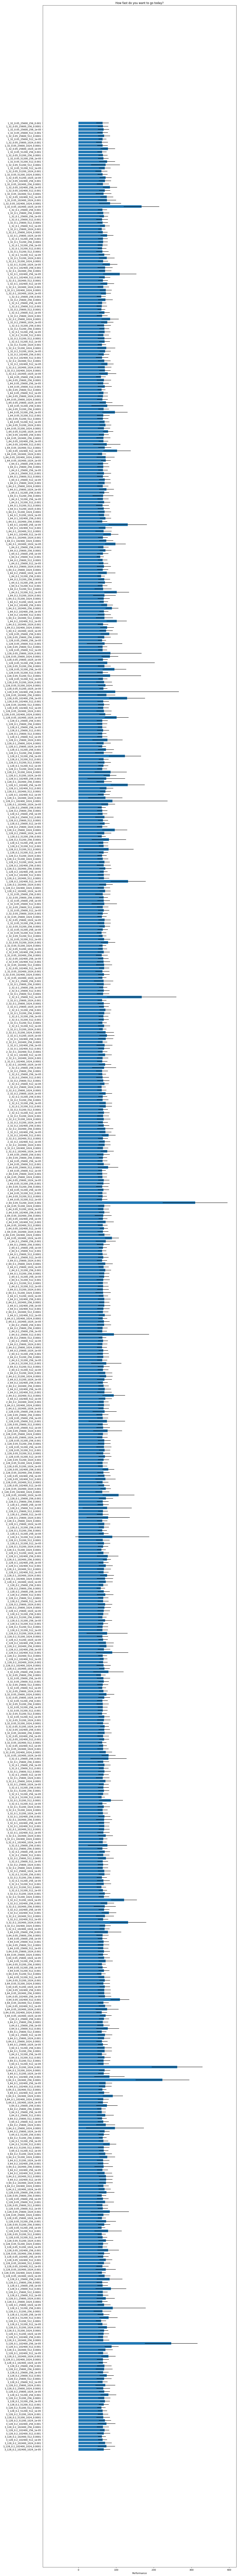

In [ ]:
y_pos = np.arange(len(models))
fig, ax = plt.subplots(figsize=(15, 200))


ax.barh(y_pos, values, xerr=error, align='center')
ax.set_yticks(y_pos, labels=models)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Performance')
ax.set_title('How fast do you want to go today?')

plt.show()